In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate

The general form of its probability density function is:
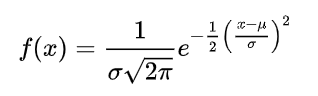

In [2]:
def normal_dist(x, mean=0.0, vari=1.0):
    """A normal distribution function
    """
    return (1.0/(np.sqrt(2.0*np.pi*vari)))*np.exp((-np.power((x-mean),2.0))/(2.0*vari))

def MSEintegrand(x, yVal):
    return  ((x- yVal)**2) * normal_dist(x)

def integrand2(x):
    return  x * normal_dist(x)

def integrand3(x):
    return  normal_dist(x)

def UniformQuantizer(x):
    return [{"from": x[i], "to": x[i+1], "value":( x[i]+ x[i+1])/2, } for i in range(len(x)-1)]


def LyoidMax(xorg, yor):
    threshold = 0.0001
#     print("xorg, yorg", xorg, yor)
    b, sigma= None, 10000
    b=  [x[i] for i in  range(len(x))] # original boundary value
    y=  [(b[i]+ b[i+1])/2+0.0000001 for i in  range(len(x)-1)] #temp y values
#     print("len(y)  b", len(y), len(b), y, b)

    while True:
        for i in  range(0, len(b)-2):
            b[i]= (y[i]+ y[i+1])/2 
#         print("updated B", b)
        sigma = sum([integrate.quad(MSEintegrand, b[i], b[i+1], y[i])[0] for i in range(len(x)-1)])
#         print("sigma: ", sigma, y)
        if sigma < threshold: print('break'); break
        y=[]
        for i in range(len(x)-1):
#             print(integrate.quad( integrand3, b[i], b[i+1],)[0], b[i], b[i+1] )
            y.append(integrate.quad( integrand2, b[i], b[i+1],)[0]\
                                     /integrate.quad( integrand3, b[i], b[i+1],)[0])
    
    toReturn=[]
    for e in y:
        toReturn.append({"value":e , "from":b[i] , "to":b[i+1]})
           
    return toReturn, b, [normal_dist(e) for e in b]

In [3]:
Data =[]
for i in range(5, 20, 1):
    M=i #Number of quantization levels
    Xmin, Xmax = -4, 4
    x= np.linspace(Xmin,Xmax, M ) #evenly spaced M samples over a specified interval.
    y = [normal_dist(i) for i in np.linspace(Xmin,Xmax, M )] #  #quant levels
    yqant = UniformQuantizer(x) #quantized data
#     yqant,x, y = LyoidMax(x, y)    ; 
#     y= [v['value'] for v in yqant#y, b
    QuantError = sum([integrate.quad(MSEintegrand, v['from'], v['to'],v['value'] )[0] for v in yqant])
    Data.append({"error" :QuantError, "M": M})
    
    if M==15:
        plt.plot(np.linspace(Xmin,Xmax, 1000 ),  [normal_dist(i) for i in np.linspace(Xmin,Xmax, 1000 )]) #gaussian curve
        for i in x: plt.axvline(x=i, color="red", linewidth=0.5) # horizontal lines representing levels
        plt.plot(x, y) # reconstructed graph
        for i in yqant: plt.hlines(y = normal_dist(i['value']), xmin = i['from'], xmax = i['to'], color="green")   #quant level
        plt.xlabel('x - axis')
        plt.ylabel('y - axis')
        plt.title('Line graph!')
        plt.show()

In [4]:
plt.plot([e['M'] for e in Data], [e['error'] for e in Data])
plt.xlabel('No of Levels')
plt.ylabel('Quantization Error')
plt.title('Bins vs Errors')
Data
plt.show()